## Ridge vs LASSO
This exercise explores the functions of Ridge and LASSO regularlization. There are 2 datasets used: </br>
1. Standard predictors with the diabetes dataset </br>
2. Image data with added noise (zero-mean Gaussian with variance 0.1)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.preprocessing as skp
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import validation_curve, train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Diabetes Data

In [3]:
#read data
diabetes_data = pd.read_csv("./diabetes.csv")
#check data
print(diabetes_data.head())

   age  sex   bmi    map   tc    ldl   hdl  tch   ltg  glu  prog
0   59    1  32.1  101.0  157   93.2  38.0  4.0  2.11   87   151
1   48    0  21.6   87.0  183  103.2  70.0  3.0  1.69   69    75
2   72    1  30.5   93.0  156   93.6  41.0  4.0  2.03   85   141
3   24    0  25.3   84.0  198  131.4  40.0  5.0  2.12   89   206
4   50    0  23.0  101.0  192  125.4  52.0  4.0  1.86   80   135


In [4]:
#predictors
x = np.array(diabetes_data.iloc[:,:-1])
x = skp.StandardScaler().fit_transform(x)

#response
y = np.array(diabetes_data.iloc[:,-1:]).reshape((len(diabetes_data.iloc[:,-1:]),))

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#set regularization parameters
alphas = 10**np.linspace(10,-20,200)*0.5

### (a) Ridge
Use only training data with 5 fold CV with intercept</br>
Explore regularization parameters with log scale search

In [5]:
ridgeRegr = Ridge(normalize=True)
reg = "Ridge"
train_scores, test_scores = validation_curve(
    ridgeRegr, x_train, y_train, param_name="alpha", param_range=alphas,
    scoring = "neg_mean_squared_error")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


In [27]:
def val_curv(alphas, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, reg):
    #Plot CV error as a function of alpha
    plt.title("Validation Curve with "+reg+ " Regression")
    plt.xlabel("alpha parameter")
    plt.ylabel("Score (negative MSE)")
    lw = 2
    plt.semilogx(alphas, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(alphas, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(alphas, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(alphas, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

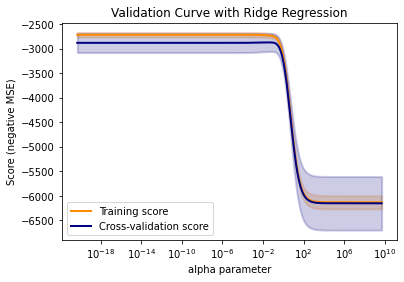

In [7]:
val_curv(alphas, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,reg)

In [8]:
alpha_best = alphas[np.argmax(test_scores_mean)]
ridge = Ridge(alpha = alpha_best, normalize = True)
ridge.fit(x_train, y_train)
MSE_train_ridge=mean_squared_error(y_train, ridge.predict(x_train))
MSE_test_ridge=mean_squared_error(y_test, ridge.predict(x_test))
print("MSE on train data for Ridge:",MSE_train_ridge)
print("MSE on test data for Ridge:",MSE_test_ridge)
print("Best regularization parameter:",alpha_best)

MSE on train data for Ridge: 2746.7337852328214
MSE on test data for Ridge: 3427.699733225887
Best regularization parameter: 0.034929398733926316


## LASSO

Use only training data with 5 fold CV with intercept
Explore regularization parameters with log scale search

In [9]:
lassoRegr = Lasso(normalize=True,max_iter=10000)
reg = "Lasso"
train_scores, test_scores = validation_curve(
    lassoRegr, x_train, y_train, param_name="alpha", param_range=alphas,
    scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

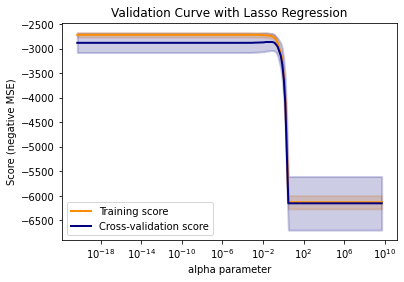

In [10]:
val_curv(alphas, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,reg)

In [11]:
lasso = Lasso(alpha=alpha_best,max_iter=10000,normalize=True)
lasso.fit(x_train, y_train)
MSE_train_lasso = mean_squared_error(y_train, lasso.predict(x_train))
MSE_test_lasso = mean_squared_error(y_test, lasso.predict(x_test))
print("MSE on train data for Lasso: ", MSE_train_lasso)
print("MSE on test data for Lasso: ", MSE_test_lasso)
print("alpha_best: ", alpha_best)

MSE on train data for Lasso:  2748.086202191185
MSE on test data for Lasso:  3427.976951055209
alpha_best:  0.034929398733926316


Analysis for Diabetes dataset:<br />
Based on the MSE for Ridge and LASSO, both forms of regularlization performed similarly the training and test datset. Adidtionally both Rigdge and LASSO with small regularization parameters had similar MSEs. Therefore, it seems like reguarlization is not really needed for this data.

## Image Data

In [12]:
from PIL import Image

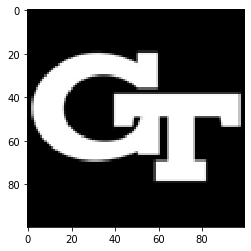

In [13]:
image_orig = Image.open("gtnew.jpg").convert("L")
height = 100
width = 100

image_resized = image_orig.resize((height, width))

# print(height, width)
coeff_first = np.frombuffer(image_resized.tobytes(), np.uint8)
# Set the shape of np array
coeff_first.shape = (height, width)

# We reverse the image along one of the dimensions to make it look like the real logo 
coeff_star = coeff_first[:, ::-1] #This is now a matrix of coefficients (the image), stored in a numpy array
# Show the image
plt.imshow(coeff_star, interpolation = "nearest", cmap = plt.cm.gray)

In [14]:
#The following function returns a specified number of vectors, or "masks". Each mask should be thought of
# as a feature vector in our language.

def randMasks(numMasks, numPixels):
    randNormalMat = np.random.normal(0,1,(numMasks,numPixels))
    # make the columns zero mean and normalize
    for k in range(numPixels):
        # make zero mean
        randNormalMat[:,k] = randNormalMat[:,k] - np.mean(randNormalMat[:,k])
        # normalize to unit norm
        randNormalMat[:,k] = randNormalMat[:,k] / np.linalg.norm(randNormalMat[:,k])
    X = randNormalMat.copy()
    Mask = randNormalMat - np.min(randNormalMat)   #This just recenters each vector
    return Mask,X

def simulator(image): #Expects image in numpy array shaped appropriately
    sp = np.sum(image)
    numMeasurements = 6500
    numPixels = image.size
    Mask, X = randMasks(numMeasurements,numPixels)
    full_signal = image.reshape((numPixels,1))
    measurements = np.dot(Mask,full_signal) + np.random.normal(0.0, 0.1, (numMeasurements,1))# LINEAR MODEL: Computes a vector of responses, or "measurements"
    measurements = measurements - np.mean(measurements) #This does a standardization on the response vector
    return measurements, X, image

In [15]:
measurements,X,I = simulator(coeff_star)  # Generates y, X according to a linear model, along with the true image I
print(measurements.shape)
z = np.random.normal(0,0.1,(6500,1))
print(z.shape)

X_train, X_test , y_train, y_test = train_test_split(X, measurements, test_size=0.2, random_state=1)

(6500, 1)
(6500, 1)


## (a) Ridge
Use only training data with 5 fold CV with intercept Explore regularization parameters with log scale search

In [16]:
reg = "Ridge"
ridgeRegr = Ridge(normalize=True)

alphas = np.logspace(-5,5, 6)
train_scores, test_scores = validation_curve(
    ridgeRegr, X_train, y_train, param_name="alpha", param_range=alphas,
    scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

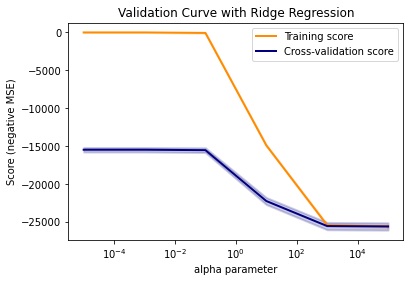

In [17]:
val_curv(alphas, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,reg)

In [18]:
alpha_best = alphas[np.argmax(test_scores_mean)]
ridge = Ridge(alpha = alpha_best, normalize = True)
ridge.fit(X_train, y_train)
MSE_train_ridge=mean_squared_error(y_train, ridge.predict(X_train))
MSE_test_ridge=mean_squared_error(y_test, ridge.predict(X_test))
print("MSE on train data for Ridge:",MSE_train_ridge)
print("MSE on test data for Ridge:",MSE_test_ridge)
print("Best regularization parameter:",alpha_best)

MSE on train data for Ridge: 0.01451771804312833
MSE on test data for Ridge: 13206.797917260723
Best regularization parameter: 0.001


In [19]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05])

## Visualize recovedered image 

In [20]:
def RidgeRegPlot(imDims, measurements, X, a, num):
    clf = linear_model.Ridge(alpha=a,normalize=True)
    clf.fit(X,measurements)
    Ihat = clf.coef_.reshape(imDims)
    
    plt.subplot(1, 2, num)
    plt.title('estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest')
    return clf.coef_

array([[ 0.00257849,  0.00143615, -0.00123391, ...,  0.00196769,
         0.00059139,  0.00099743]])

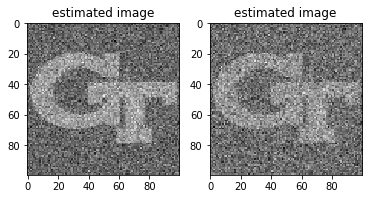

In [21]:
RidgeRegPlot((height,width),y_train,X_train,alpha_best, 1)
RidgeRegPlot((height,width),y_train,X_train,alphas[-1], 2)

#### Based on the side by side recovered images, the best alpha (best regularization parameter) recovers a clearer image than the sub-optimal regularization parameter.

## LASSO

In [22]:
lassoRegr = linear_model.Lasso(max_iter = 10000, normalize=True)
reg = "Lasso"
alphas = np.logspace(-5,5,6)
print(alphas)
train_scores, test_scores = validation_curve(
    lassoRegr, X_train, y_train, param_name="alpha", param_range=alphas,
    scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]


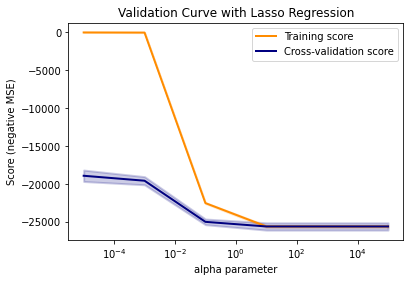

In [30]:
val_curv(alphas, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, reg)

In [31]:
alpha_best = alphas[np.argmax(test_scores_mean)]
lasso = Lasso(alpha = alpha_best, normalize = True,max_iter=10000)
lasso.fit(X_train, y_train)
MSE_train_lasso=mean_squared_error(y_train, lasso.predict(X_train))
MSE_test_lasso=mean_squared_error(y_test, lasso.predict(X_test))
print("MSE on train data for Lasso: ", MSE_train_lasso)
print("MSE on test data for Lasso: ", MSE_test_lasso)
print("Best regularization parameter: ", alpha_best)

MSE on train data for Lasso:  0.003989620715964535
MSE on test data for Lasso:  13401.582910208765
Best regularization parameter:  1e-05


In [25]:
def LassoRegPlot(imDims, measurements, X, a, num):
    clf = linear_model.Lasso(alpha=a)
    clf.fit(X,measurements)
    Ihat = clf.coef_.reshape(imDims)
    
    plt.subplot(1, 2, num)
    plt.title('estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest')
    return clf.coef_

In [38]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05])

array([ 0.,  0., -0., ...,  0.,  0.,  0.])

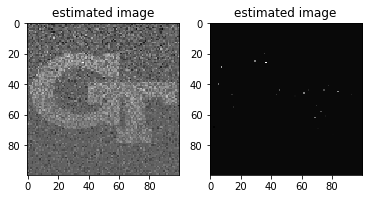

In [39]:
LassoRegPlot((height,width),y_train,X_train,alpha_best, 1)
LassoRegPlot((height,width),y_train,X_train,alphas[2], 2)

[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]


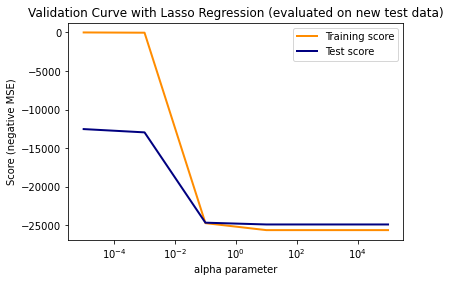

In [32]:
y_test_new,X_test_new,I = simulator(coeff_star)
lassoRegr = linear_model.Lasso(max_iter = 10000, normalize=True)
alphas = np.logspace(-5,5,6)
print(alphas)
train_scores = np.zeros(6)
test_scores = np.zeros(6)
for i in range(6):
    alpha = alphas[i]
    lasso = Lasso(alpha = alpha, normalize = True,max_iter=10000)
    lasso.fit(X_train, y_train)
    train_scores[i]=-mean_squared_error(y_train, lasso.predict(X_train))
    test_scores[i]=-mean_squared_error(y_test_new, lasso.predict(X_test_new))

alpha_best = alphas[np.argmax(test_scores)]

plt.title("Validation Curve with Lasso Regression (evaluated on new test data)")
plt.xlabel("alpha parameter")
plt.ylabel("Score (negative MSE)")
lw = 2
plt.semilogx(alphas, train_scores, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(alphas, test_scores, label="Test score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Ridge and Lasso perform similarly on the training and test data when evaluating with MSE based on the validation curves.